# Fast introduction to Spark
<a href="http://wiggi.mx/"><img src="img/wiggi.jpeg" width="70px"></img></a>

# Menu

In [84]:
%%javascript
    /*
        WiggiMX:feel free to use it just give us the credit with a short mention :)
    */
    $("#homeButton").remove()
    $('body').append('<a href="#'+$("h1,h2,h3:eq(0)").attr("id")+'" style="position: fixed; bottom: 10px; right: 10px;" type="button" class="btn btn-success btn-circle btn-lg"><i class="glyphicon glyphicon-link" id="homeButton"></i></a>');
    $("#MainMenu").remove()
    var menu = 
      '<div id="MainMenu" style="position: fixed; top: 120px; right: 10px; z-index:6; max-height: 500px;">'+
        '<div class="list-group panel" >'+
          '<a href="#collapseMenu" class="list-group-item list-group-item-success" data-toggle="collapse" data-parent="#MainMenu"><img width="20px" src="/kernelspecs/python3/logo-64x64.png"/><i class="fa fa-caret-down"></i></a>'+
          '<div class="collapse" id="collapseMenu" style="overflow-y: overlay; max-height: 500px;">'+
          '</div>'+
        '</div>'+
      '</div>'
   
    var parent = $(menu)
    var arrayIds = []
    $("h1,h2,h3").attr("id",function(id,Value){
        if(Value != ""){
            var content = (Value.replace(new RegExp('-', 'g'), ' '));
            content = "&nbsp;".repeat(parseInt($(this).prop("tagName")[1])*2-1) + content;
            $(parent).find("#collapseMenu").append('<a href="#'+Value+'" style="position:relative;" class="list-group-item" data-parent="#SubMenu1">'+content+'</a>');
        }
    })
$('body').append(parent)

<IPython.core.display.Javascript object>

# Inicializando el contexto spark (driver)
En esta parde inicializaremos el contexto spark, que nos servira para levantar una sesión

In [3]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
spark = SparkSession \
       .builder.master("local[*]") \
       .appName("wiggi_loves_you") \
       .getOrCreate()

sc = spark.sparkContext

In [4]:
from pyspark.sql import Row

## Cargando información

## Cargando header

In [5]:
variable_names =list( pd.read_csv("dataset/uci_har_dataset/features.txt", sep=" ",names=["index","name"])["name"])

In [6]:
variable_names[:3]

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']

## Cargando target names

## Nombrando columna target

In [7]:
target = "target"

In [8]:
columns = [target]+variable_names

In [9]:
activity_labels = spark.createDataFrame(pd.read_csv("dataset/uci_har_dataset/activity_labels.txt", sep=" ",names=[target,"name"]))

In [10]:
activity_labels.toPandas()

,target,name
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


## Cargando conjunto de entrenamiento

In [11]:
test_dataframe_rdd = sc.textFile("dataset/uci_har_dataset/train/train.txt")

In [12]:
test_dataframe_with_label= test_dataframe_rdd.map(
                                lambda rw: Row(
                                                *list(
                                                        map(
                                                            lambda val:float(val),
                                                            rw.replace("  "," ").strip().split(" ")
                                                        )
                                                )
                                )
).toDF(columns)

In [13]:
test_dataframe = test_dataframe_with_label.join(activity_labels, target).cache()

In [14]:
test_dataframe.count()

7352

In [15]:
test_dataframe.columns

['target',
 'tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',


In [16]:
test_dataframe.limit(5).toPandas()

,target,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",name
0,1.0,0.282022,-0.037696,-0.134897,-0.328280,-0.137153,-0.189086,-0.404875,-0.176791,-0.199474,...,-0.312137,-0.673951,-0.160883,0.564736,0.912473,-0.412836,-0.773707,0.252432,0.044099,WALKING
1,1.0,0.255841,-0.064550,-0.095186,-0.229207,0.016506,-0.260311,-0.276764,0.009066,-0.287367,...,-0.176625,-0.584284,-0.021977,0.506609,-0.700053,-0.840943,-0.767163,0.256919,0.044638,WALKING
2,1.0,0.254867,0.003815,-0.123658,-0.275158,0.013080,-0.284371,-0.341341,-0.026013,-0.320272,...,-0.365417,-0.696201,0.372041,-0.106184,-0.923835,0.344459,-0.757414,0.264452,0.039417,WALKING
3,1.0,0.343370,-0.014446,-0.167377,-0.229924,0.173911,-0.213388,-0.282882,0.144693,-0.237987,...,-0.203301,-0.546873,-0.378574,-0.582073,-0.886349,0.063337,-0.762534,0.260850,0.039735,WALKING
4,1.0,0.276240,-0.029638,-0.142616,-0.226577,0.164288,-0.122545,-0.239526,0.140287,-0.148617,...,0.046239,-0.269192,-0.072906,0.656842,-0.291200,0.077922,-0.763968,0.259629,0.041412,WALKING


In [17]:
test_dataframe.printSchema()

root
 |-- target: double (nullable = true)
 |-- tBodyAcc-mean()-X: double (nullable = true)
 |-- tBodyAcc-mean()-Y: double (nullable = true)
 |-- tBodyAcc-mean()-Z: double (nullable = true)
 |-- tBodyAcc-std()-X: double (nullable = true)
 |-- tBodyAcc-std()-Y: double (nullable = true)
 |-- tBodyAcc-std()-Z: double (nullable = true)
 |-- tBodyAcc-mad()-X: double (nullable = true)
 |-- tBodyAcc-mad()-Y: double (nullable = true)
 |-- tBodyAcc-mad()-Z: double (nullable = true)
 |-- tBodyAcc-max()-X: double (nullable = true)
 |-- tBodyAcc-max()-Y: double (nullable = true)
 |-- tBodyAcc-max()-Z: double (nullable = true)
 |-- tBodyAcc-min()-X: double (nullable = true)
 |-- tBodyAcc-min()-Y: double (nullable = true)
 |-- tBodyAcc-min()-Z: double (nullable = true)
 |-- tBodyAcc-sma(): double (nullable = true)
 |-- tBodyAcc-energy()-X: double (nullable = true)
 |-- tBodyAcc-energy()-Y: double (nullable = true)
 |-- tBodyAcc-energy()-Z: double (nullable = true)
 |-- tBodyAcc-iqr()-X: double (null

# Exploratorio

## Imports de librerias de visualización

In [19]:
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [20]:
num_rows_test = test_dataframe.count() 

## Gráficas distribución

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


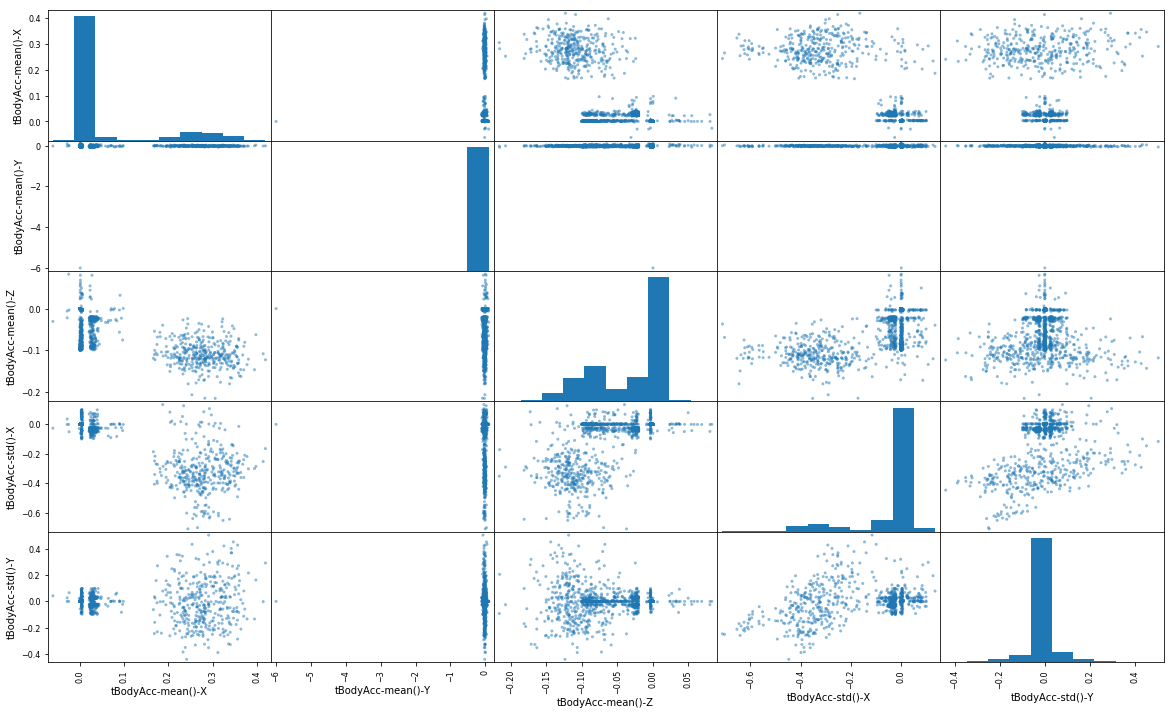

In [23]:
import matplotlib.pyplot as plt

from pandas.tools.plotting import scatter_matrix
scatter_matrix(test_dataframe.select(*variable_names[:5]).sample(0.3).toPandas(),figsize=(20,12))
plt.show()

## Matriz de correlación

In [24]:
from pyspark.mllib.stat import Statistics

In [25]:
"target" in variable_names

False

In [26]:
corr_matrix = Statistics.corr(test_dataframe.select(variable_names+[target]).rdd.map(lambda row: row[0:]), method="pearson")

In [27]:
corr_dataframe = pd.DataFrame(corr_matrix,columns=variable_names+[target], index=variable_names+[target])

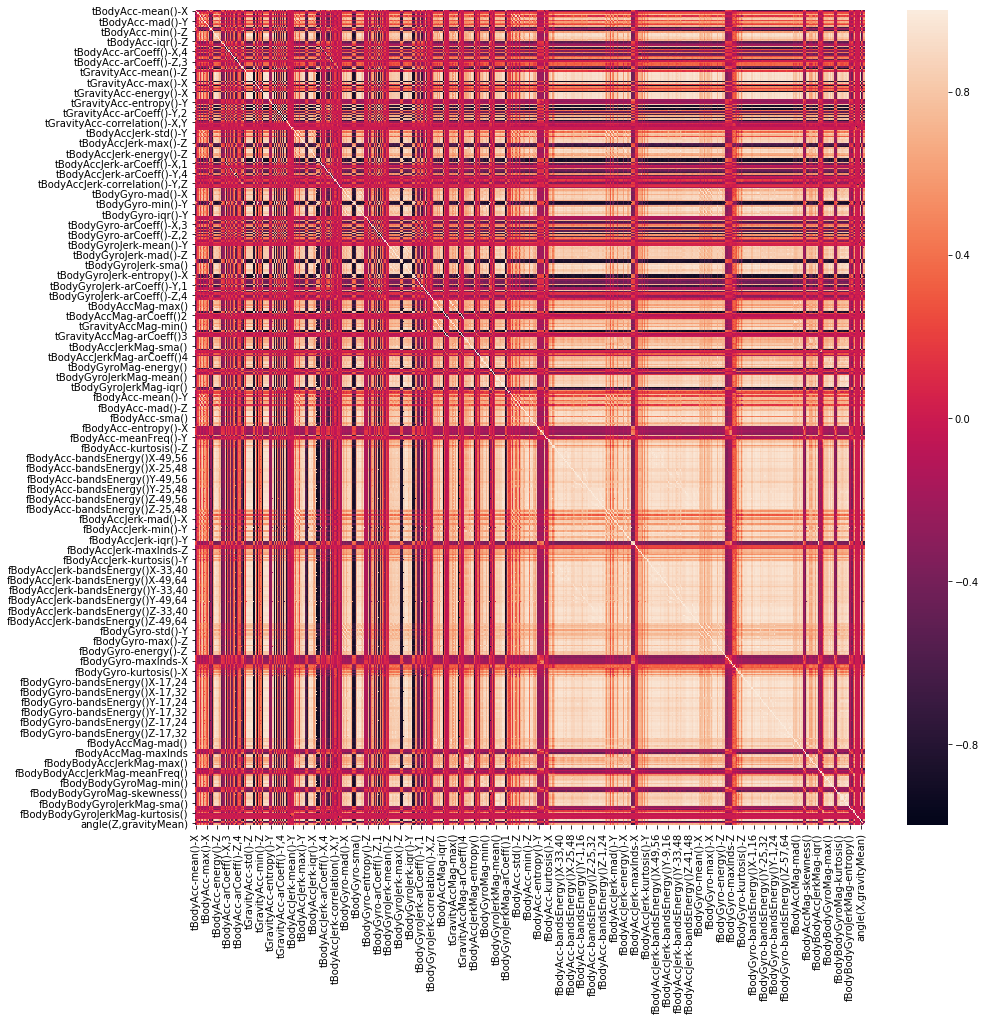

In [33]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_dataframe,ax=ax)
plt.show()

## Generando las N variables mejor correlacionadas con el target

In [29]:
correlation_with= corr_dataframe["target"]

In [30]:
columns_correlated = list(correlation_with.map(lambda o: abs(o)).sort_values(ascending=False)[:20].index)

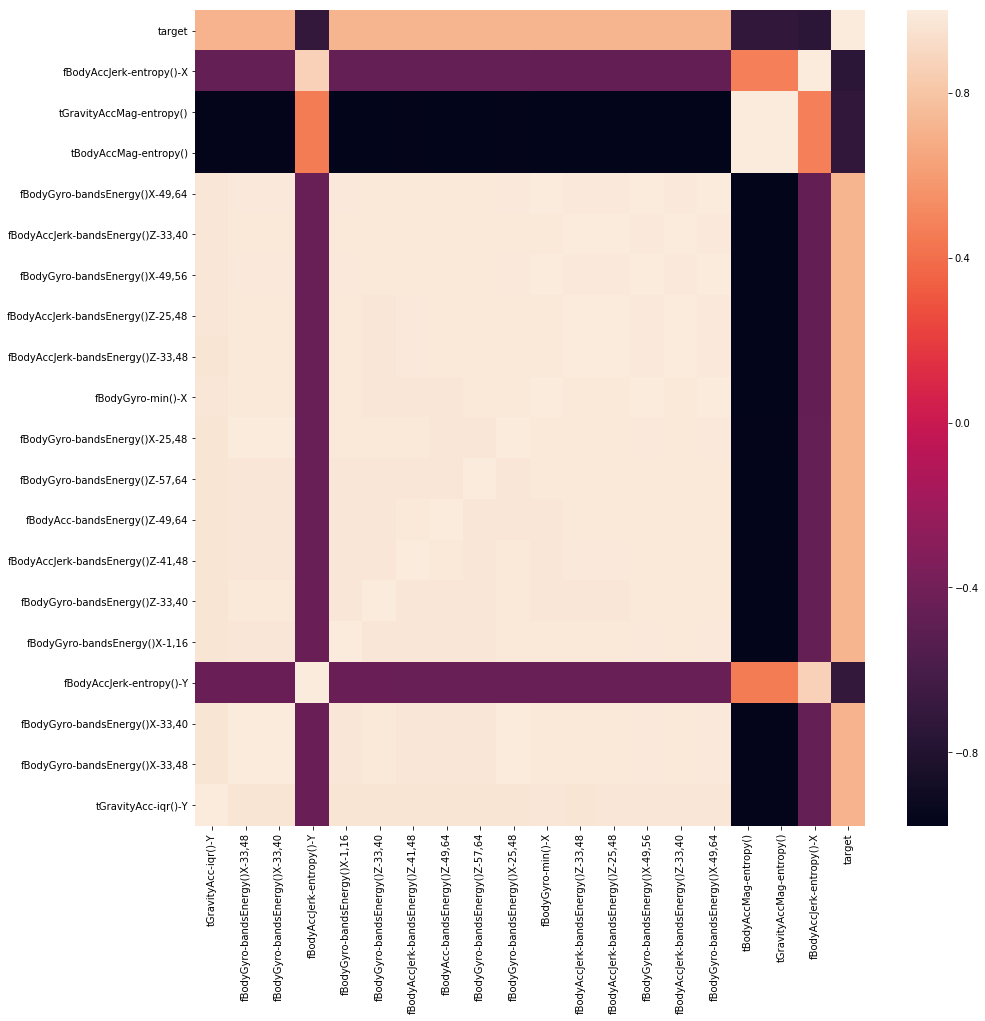

In [32]:
columns_show = [*columns_correlated]
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr_dataframe[list(reversed(columns_show))].loc[columns_show], ax=ax)
plt.show()

### Distribución de varibles importantes

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


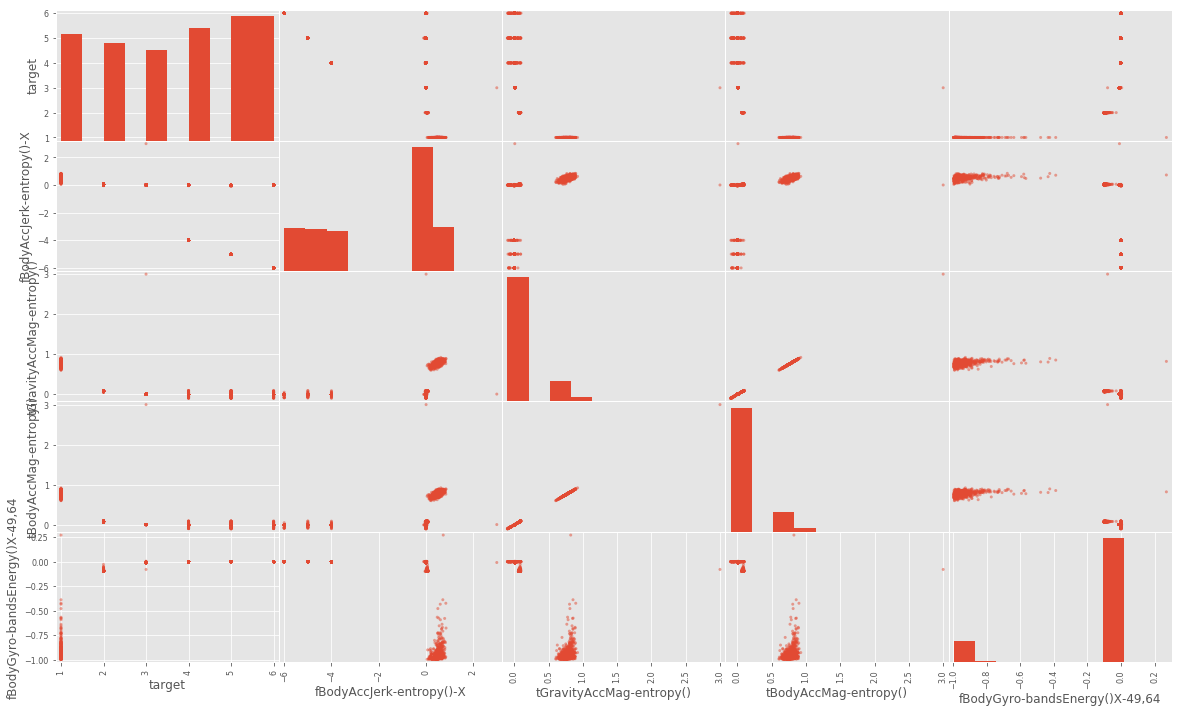

In [35]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from pandas.tools.plotting import scatter_matrix
scatter_matrix(test_dataframe.select(columns_show[:5]).sample(0.6).toPandas(),figsize=(20,12))
plt.show()

## Proporción en cada clase

In [37]:
proportion_dataframe = test_dataframe.groupBy(target).agg(F.count("*").alias("count"), F.first("name").alias("name")).withColumn("proportion",F.col("count")/num_rows_test).orderBy(target).toPandas()

In [38]:
proportion_dataframe

,target,count,name,proportion
0,1.0,1226,WALKING,0.166757
1,2.0,1073,WALKING_UPSTAIRS,0.145947
2,3.0,986,WALKING_DOWNSTAIRS,0.134113
3,4.0,1286,SITTING,0.174918
4,5.0,1374,STANDING,0.186888
5,6.0,1407,LAYING,0.191376


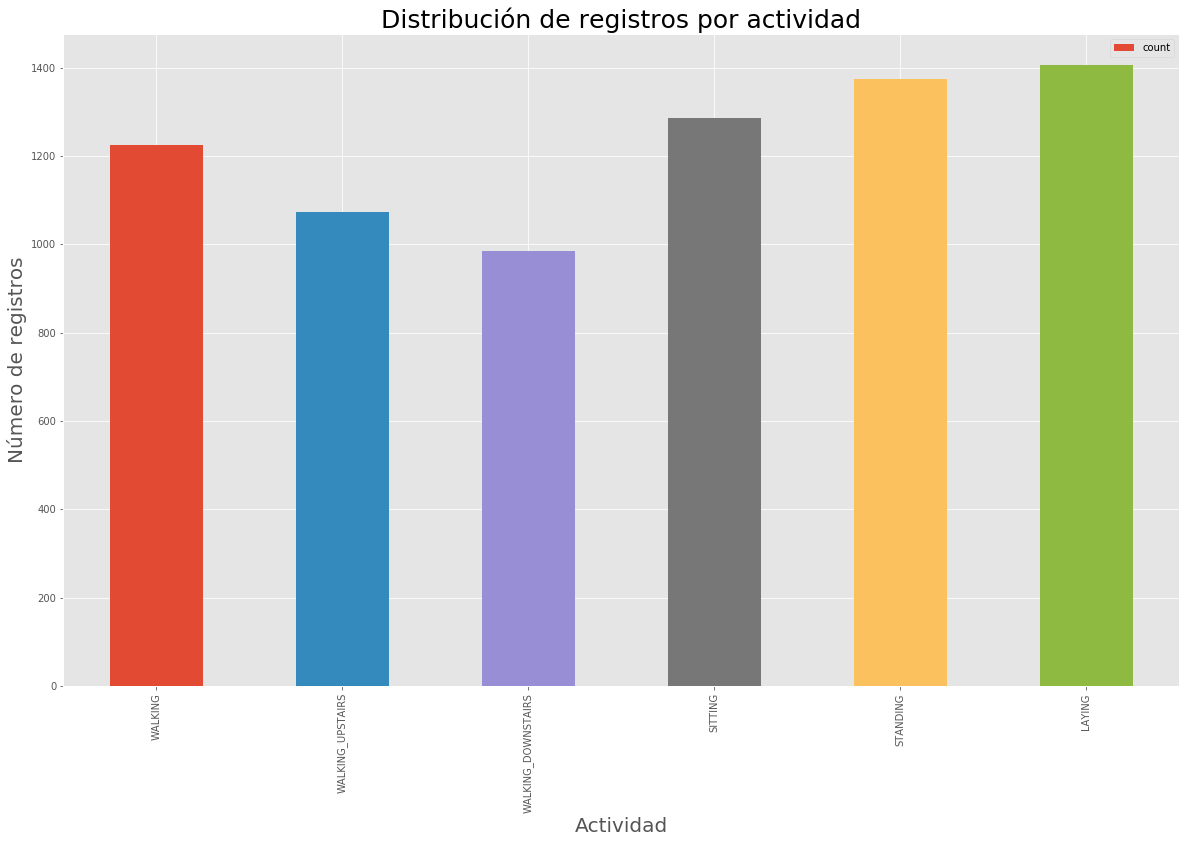

In [39]:
proportion_dataframe.plot.bar(x="name",y="count",figsize=(20,12))
plt.title("Distribución de registros por actividad",fontsize=25)
plt.ylabel("Número de registros", fontsize = 20)
plt.xlabel("Actividad", fontsize = 20)
plt.show()

## Analisis PCA

Nuestro objetivo será buscar una transformación que mejor conserve la información y reducir la dimensionalidad (complejidad) de nuestros datos

<img src="img/pca_example.gif"/>

Para minimizar la perdida de información,maximizamos la varianza de la transformación lo que despues de varios trucos matematicos da lugar a los valoresy vectores caracteristicos

In [40]:
from pyspark.ml.feature import PCA
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.linalg import Vectors

### Preparando el DataFrame para PCA
Normalmente a este punto debemos de normalizar los datos, pero segun la página del dataset estos ya lo estan

In [41]:
assembler = VectorAssembler(inputCols=variable_names, outputCol="features")
vector_dataframe = assembler.transform(test_dataframe)
vector_dataframe.limit(2).toPandas()

,target,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",name,features
0,1.0,0.282022,-0.037696,-0.134897,-0.328280,-0.137153,-0.189086,-0.404875,-0.176791,-0.199474,...,-0.673951,-0.160883,0.564736,0.912473,-0.412836,-0.773707,0.252432,0.044099,WALKING,"[0.28202157, -0.037696218, -0.1348973, -0.3282..."
1,1.0,0.255841,-0.064550,-0.095186,-0.229207,0.016506,-0.260311,-0.276764,0.009066,-0.287367,...,-0.584284,-0.021977,0.506609,-0.700053,-0.840943,-0.767163,0.256919,0.044638,WALKING,"[0.25584075, -0.064550029, -0.095186339, -0.22..."


In [42]:
pca_model = PCA(k=3,inputCol="features", outputCol="pca_features")

In [43]:
pca_model_trained = pca_model.fit(vector_dataframe)

In [44]:
# Es una udf que nos regresa el resultado de una columna vector en el indice index
udf_item = F.udf(lambda vector,index: float(vector.values[index]))
result_pca_dataframe = pca_model_trained.transform(
                vector_dataframe
            ).select(
                    F.col("pca_features"),
                    target
            ).withColumn(
                    "PC1",
                    udf_item(F.col("pca_features"), F.lit(0))
            ).withColumn(
                    "PC2",
                    udf_item(F.col("pca_features"), F.lit(1))
            ).withColumn(
                    "PC3",
                    udf_item(F.col("pca_features"), F.lit(2))
            )

In [45]:
result_pca_dataframe.limit(3).toPandas()

,pca_features,target,PC1,PC2,PC3
0,"[-5.66619154697, 10.4629615329, -4.51735885063]",1.0,-5.6661915469723265,10.462961532933416,-4.517358850629036
1,"[-5.66445226865, 9.64372636752, -4.49338675373]",1.0,-5.664452268651102,9.643726367519548,-4.493386753730525
2,"[-5.5679531238, 10.1282711933, -4.25884226966]",1.0,-5.5679531238049105,10.128271193277422,-4.2588422696636625


### Gráficando PCA dos componentes

In [51]:
pca_pandas = result_pca_dataframe.sample(0.2).toPandas()

In [52]:
pca_pandas.count()

pca_features    1464
target          1464
PC1             1464
PC2             1464
PC3             1464
dtype: int64

In [53]:
pca_pandas["PC1"] = pca_pandas["PC1"].astype("float")
pca_pandas["PC2"] = pca_pandas["PC2"].astype("float")
pca_pandas["PC3"] = pca_pandas["PC3"].astype("float")

In [54]:
import matplotlib.cm as cm
import numpy as np

In [55]:
colors = cm.rainbow(np.linspace(0, 1, 6))

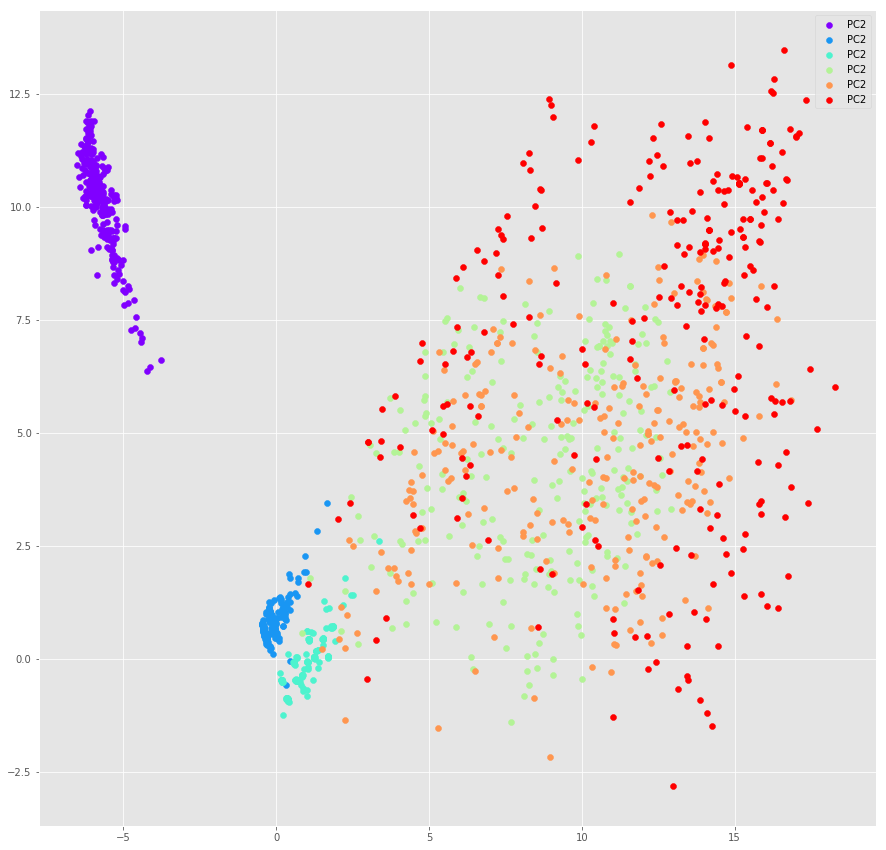

In [58]:
fig, ax = plt.subplots(figsize=(15, 15))

for x in range(1,7):
    to_plot_dataframe = pca_pandas[pca_pandas["target"] == x]
    plt.scatter(x=to_plot_dataframe["PC1"], y=to_plot_dataframe["PC2"], c=colors[x-1])
ax.legend()
plt.show()

### Gráficando 3 componentes

In [59]:
LABELS = ["", "WALKING",
"WALKING_UPSTAIRS",
"WALKING_DOWNSTAIRS",
"SITTING",
"STANDING",
"LAYING"]

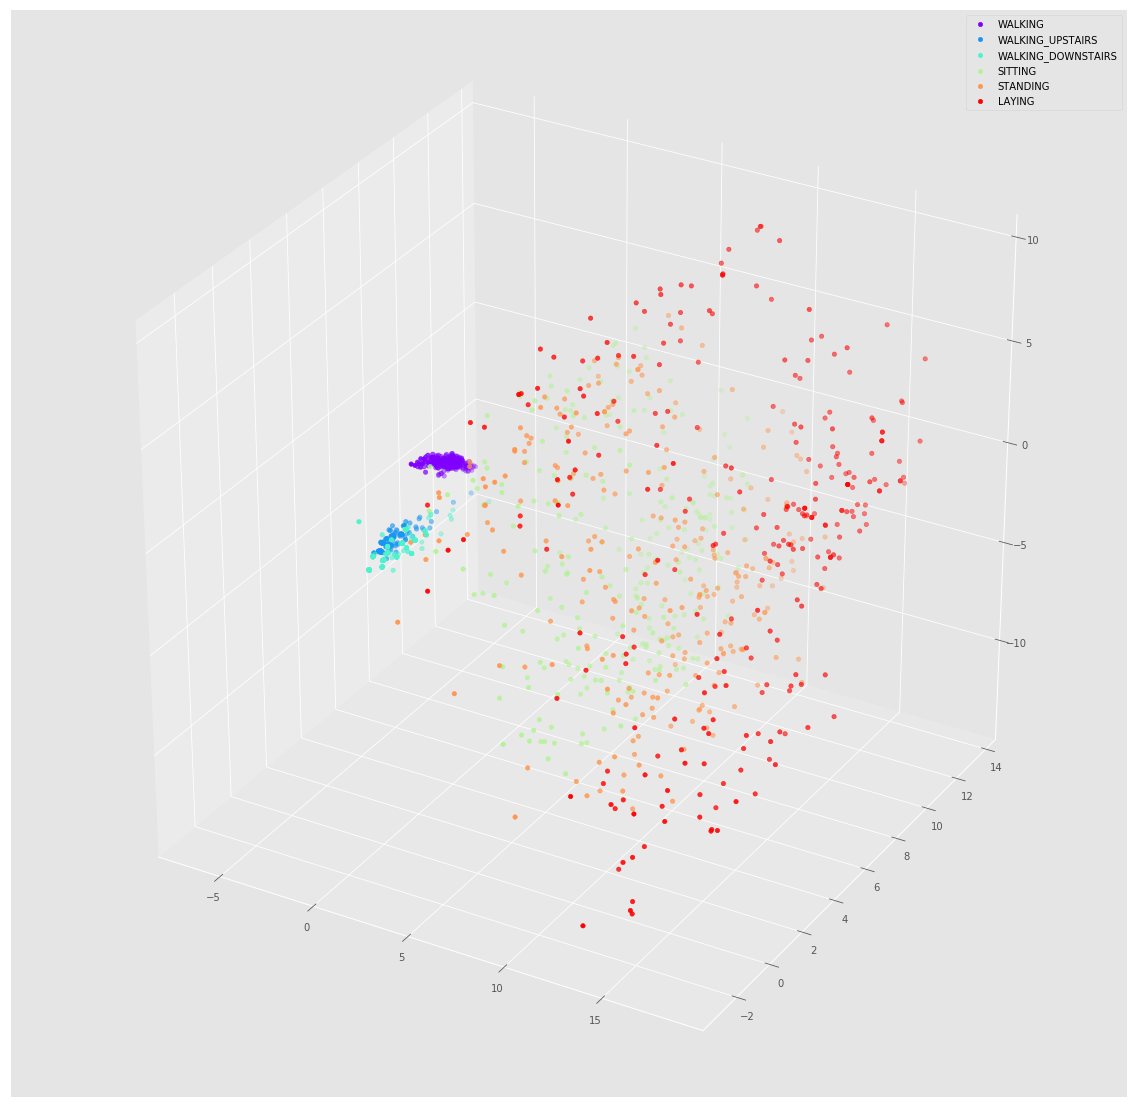

In [60]:
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("ggplot")
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')


for x in range(1,7):
    to_plot_dataframe = pca_pandas[pca_pandas["target"] == x]
    ax.scatter(xs=to_plot_dataframe["PC1"], ys=to_plot_dataframe["PC2"], zs=to_plot_dataframe["PC3"], c=colors[x-1],label=LABELS[x])
ax.legend()
plt.show()

### Varianza explicada

,explained variance
0,0.363027
1,0.117125
2,0.096458


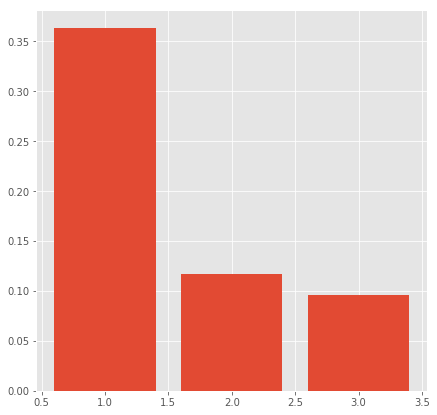

In [62]:
plt.figure(figsize=(7,7))
eigenvalues = [float(value) for value in pca_model_trained.explainedVariance]
plt.bar(list(range(1,len(eigenvalues)+1)),eigenvalues)
pd.DataFrame(eigenvalues,columns=['explained variance'])

# Entrenamiento

### Preparando el dataframe entrenamiento

In [64]:
from pyspark.ml.feature import  VectorAssembler

In [66]:
target in variable_names

False

In [67]:
num_features= len(variable_names)
assembler = VectorAssembler(inputCols=variable_names, outputCol="features")
vector_test_dataframe = assembler.transform(test_dataframe)
vector_test_dataframe.limit(2).toPandas()

,target,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",name,features
0,1.0,0.282022,-0.037696,-0.134897,-0.328280,-0.137153,-0.189086,-0.404875,-0.176791,-0.199474,...,-0.673951,-0.160883,0.564736,0.912473,-0.412836,-0.773707,0.252432,0.044099,WALKING,"[0.28202157, -0.037696218, -0.1348973, -0.3282..."
1,1.0,0.255841,-0.064550,-0.095186,-0.229207,0.016506,-0.260311,-0.276764,0.009066,-0.287367,...,-0.584284,-0.021977,0.506609,-0.700053,-0.840943,-0.767163,0.256919,0.044638,WALKING,"[0.25584075, -0.064550029, -0.095186339, -0.22..."


## RandomForest



### ¿Qué es Random Forest?

Random Forest se basa en el Aprendizaje por Ensamble, que a su vez se inspira en la idea de la "sabiduría de la multitud" (wisdom of the crowd).
- Si se le pregunta algo complejo a miles de personas al azar y se agregan sus respuestas, en muchos casos el agregado de las respuestas es mejor que la respuesta de un experto.

- Entonces si agregamos las predicciones de un grupo de clasificadores o regresores en general se obtendrán mejores predicciones que con el mejor predictor individual.

**A un grupo de predictores se le denomina un ensamble**

De allí viene la idea del aprendizaje por ensamble.

<div class="alert alert-success" role="alert">
  Por ejemplo se puede entrenar un grupo de clasisificadores de árboles de decisión, cada uno en un subconjunto aleatorio del conjunto de entrenamiento. Para hacer predicciones, obtendríamos la predicción de cada árbol individual y haríamos la predicción con la clase que obtenga más votos. <strong>A este ensamble de árboles de decisión lo llamamos Random Forest</strong>. 
</div>

<img src="./img/random_forest.png">

En los ensambles, se puede usar el mismo algoritmo de entrenamiento como predictor (en este caso árboles de deicisión), pero entrenarlos en differentes subconjuntos aleatorios del conjunto de entrenamiento 
Dos conceptos útiles:
* **Bagging** Es un ensamble con el mismo algoritmo de entrenamiento haciendo muestreo del conjunto de datos de entrenamiento **con reemplazo**. 


Es común utilizar bagging.

Además de para clasificación y regresión, un uso común de Random Forest es medir fácilmente la importancia relativa de cada variable, motivo por el cual suele usarse tambiém como un metodo de selección de variables.

### Proceso

In [68]:
from pyspark.ml  import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import IndexToString, StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#### Entrenamiento

In [18]:
spark

In [70]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


numFolds = 4

rf = RandomForestClassifier(labelCol=target, featuresCol="features")
evaluator = MulticlassClassificationEvaluator(labelCol=target) 
pipeline = Pipeline(stages=[rf])
paramGrid =  ParamGridBuilder().addGrid(rf.numTrees,[5,10,20,50,100]).build()
crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=numFolds)

model = crossval.fit(vector_test_dataframe)
model

CrossValidatorModel_4fe8b90be6d59ab9ba75

In [71]:
model.bestModel.stages[0]

RandomForestClassificationModel (uid=RandomForestClassifier_45bbad1959393ff48ffb) with 20 trees

### Prueba

#### Carga de conjunto de prueba

In [72]:
t_dataframe_rdd = sc.textFile("dataset/uci_har_dataset/test/test.txt")

In [73]:
t_dataframe_with_label= test_dataframe_rdd.map(
                                lambda rw: Row(
                                                *list(
                                                        map(
                                                            lambda val:float(val),
                                                            rw.replace("  "," ").strip().split(" ")
                                                        )
                                                )
                                )
).toDF(columns)

In [74]:
t_dataframe = t_dataframe_with_label.join(activity_labels, target).cache()

In [75]:
t_dataframe.limit(3).toPandas()

,target,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",name
0,1.0,0.282022,-0.037696,-0.134897,-0.328280,-0.137153,-0.189086,-0.404875,-0.176791,-0.199474,...,-0.312137,-0.673951,-0.160883,0.564736,0.912473,-0.412836,-0.773707,0.252432,0.044099,WALKING
1,1.0,0.255841,-0.064550,-0.095186,-0.229207,0.016506,-0.260311,-0.276764,0.009066,-0.287367,...,-0.176625,-0.584284,-0.021977,0.506609,-0.700053,-0.840943,-0.767163,0.256919,0.044638,WALKING
2,1.0,0.254867,0.003815,-0.123658,-0.275158,0.013080,-0.284371,-0.341341,-0.026013,-0.320272,...,-0.365417,-0.696201,0.372041,-0.106184,-0.923835,0.344459,-0.757414,0.264452,0.039417,WALKING


#### Evaluación

In [76]:
vector_t_dataframe = assembler.transform(t_dataframe)

In [77]:
t_result_dataframe = model.transform(vector_t_dataframe)

In [78]:
evaluator.evaluate(t_result_dataframe)

1.0

In [79]:
t_result_dataframe.where(F.col("target")==F.col("prediction")).count()/t_result_dataframe.count()

1.0

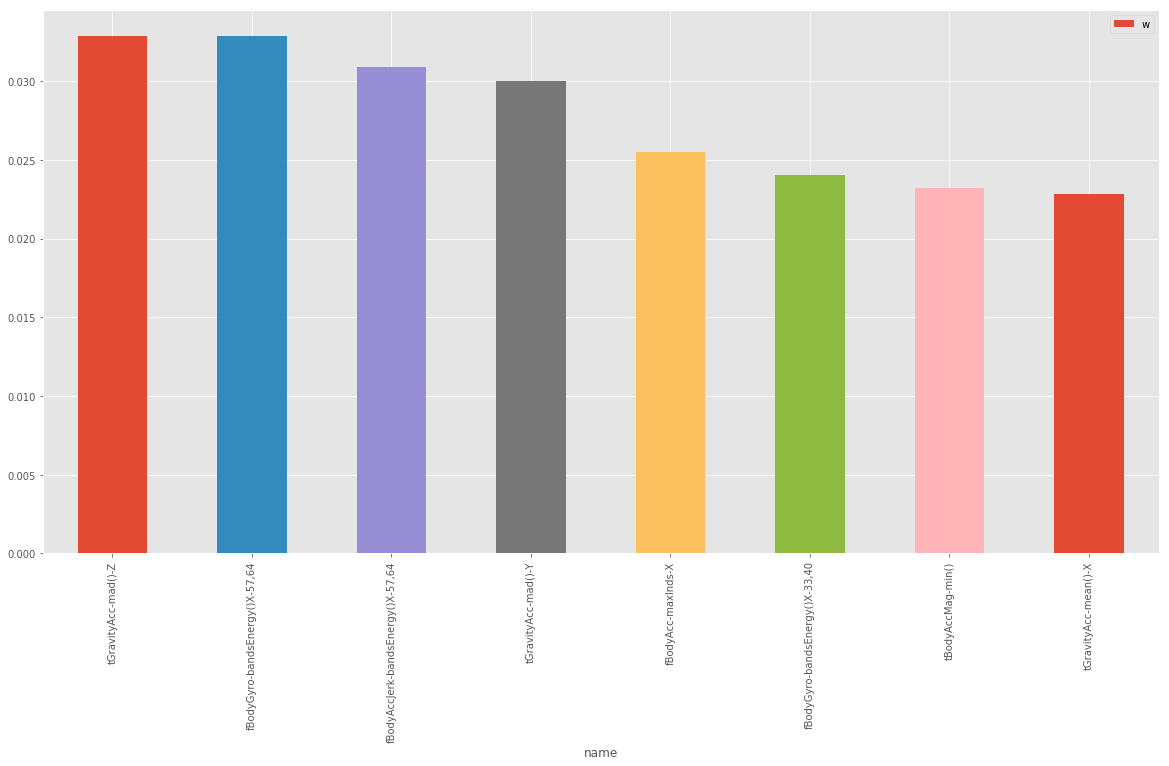

In [81]:
fet = model.bestModel.stages[0].featureImportances
fet_pd = pd.DataFrame(data={"name":variable_names,"w":fet.toArray()})

fet_pd.sort_values(by="w",ascending=False).head(8).plot.bar(x="name",y="w", figsize=(20,10))
plt.show()


# Autor
https://github.com/datadogmx
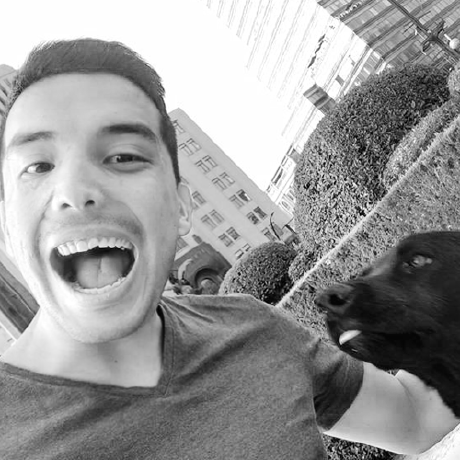

# Fuentes

https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones <br/>
https://spark.apache.org/docs/latest/ml-features.html#pca

# ¡Gracias!